# TPM034A Machine Learning for socio-technical systems
## `Assignment 03: Visualising liveability in Rotterdam`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido-Valenzuela & Lucas Spierenburg <br>


## `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below).

### `Workspace set-up`

**Option 1: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [ ]:
#!pip install -r requirements.txt

**Option 2: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [ ]:
!git clone https://github.com/TPM034A/Q2_2023
!pip install -r Q2_2023/requirements_colab.txt
!mv  "/content/Q2_2023/Assigments/assignment_03/data" /content/data
!mv "/content/Q2_2023/Assigments/assignment_03/assets" /content/assets

fatal: destination path 'Q2_2023' already exists and is not an empty directory.
mv: cannot stat '/content/Q2_2023/Assigments/assignment_03/data': No such file or directory
mv: cannot stat '/content/Q2_2023/Assigments/assignment_03/assets': No such file or directory


# `Application: liveability in Rotterdam` <br>

### **Introduction**

**Liveability** is a concept used to describe the quality of life in a certain area of a city. The liveability of an area is determined by a combination of factors, such as the presence of amenities, the quality of the environment, and the safety in the area. Therefore, liveability is a complex concept that is difficult to measure and/or quantify. In the Netherlands, an instrument developed to analyse liveability (of an area) is called the *Leefbaarometer*. The Leefbaarometer, owned by the Ministry of the Interior and Kingdom Relations, provides an estimate of the liveability  at 100x100 grid (for the entire Netherlands). The Leefbaarometer is used to signal areas with low liveability and to monitor the evolution of liveability over time (monitoring). See this [link](https://www.leefbaarometer.nl/home.php) for more information.

Currently, the Leefbaarometer does not consider the visual appearance of urban spaces. But, intuitively a relationship between the two exist (as we explored in Lab Session 03). In this assignment, you will utilise Machine Learning (ML) to predict liveability scores (taken from Leefbaarometer) based on street-level images. Just as we did in Lab session 03 when we predicted neighbourhood attractiveness, your task in this assignment is to explore using ML models to predict liveability and investigate its relationship with the visual appearance of the urban spaces (image embeddings).

#### **Data**
For this assignment you have access to different datasets. All of them will be available in the data folder after the execution of cell below this instructions. The data folder contains four sub-folder: `image_tabular`, `geo`, `liveability`, and `images`. The following list describes the datasets.

1. `data/image_tabular/image_metadata.csv`: A csv file with the image metadata (e.g., year, month or location) of Rotterdam images.
2. `data/image_tabular/image_embeddings.csv`: A tabular csv file with image embeddings from Rotterdam.
3. `data/geo/grid.gpkg`: A geo dataset of spatial units for the Netherlands called grid cells.
4. `data/liveability/liveability_scores.csv`: A tabular csv file with liveability scores for each grid cell in the Netherlands.
5. `data/images`: A folder with image files from Rotterdam (read below for more details).

As indicated, run the code in the cell below to prepare the dataset. The cell will download the datasets and place them in the data folder automatically for this assigment. It may take up to two minutes to download the data.

### **Notes**
- The Leefbaarometer is computed for different years and with different models (called verions). The following list provide an explanation of the columns in the liveability dataset:
    - `grid_id`: Geographical grid id of the liveability score
    - `versie`: Version of the Leefbaarometer model used to determine liveability scores
    - `jaar`: Year of the liveability score
    - `lbm`: liveability score
    - (`afw`, `fys`, `onv`, `soc`, `vrz`, `won`): Other indicators. If you want to explore them visit this [link](https://www.leefbaarometer.nl/home.php).
- The liveability data comes at grid level (100mx100m squares). In Lab Session 03 you worked with hexagon shaped data. Therefore, in this assigment you have to associate the image data with the grid.

In [ ]:
## IMPORTANT: You have to be on the TUDelft network (eduroam) or under eduVPN to run this script
from assets import data_downloader as dld
dld.download_data()

Download complete!
Unzipping the folder...
Unzip complete!
Removing zip file...
Done!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Tasks and grading**

Your assignment is divided into 4 subtasks: (1) Data preparation, (2) Data exploration, (3) Model training, and (4) Reflection. In total, 10 points can be earned in this assignment. The weight per subtask is indicated below.

1. **Data preparation** [2.0 pnt]<br>
    1. Loading datasets. Load the data from geo, image_tabular, and liveability sub-data folders and visualize them with `df.head()`.<br>
    1. Preparing liveability dataset. First, filter the liveability data to keep only the `version 3.0` (`versie` column) and `2020` (`jaar` column). Then, add the grid geometry to the resulting dataset based on `grid_id`. To do so, merge it with the grid dataset.<br>
    1. Preparing the image dataset. First, merge the image metadata with the image embeddings using `img_id`. Then, convert the resulting DataFrame into a GeoDataFrame (check the function provided in Lab03). Finally, do a left spatial join (`gpd.sjoin(how = 'left')`) with the grid dataset to add the corresponding grid_id and grid geometry to each image row.<br>
    1. Preparing the combined liveability-image dataset. First, merge the liveability data (from 1.2) with the image data (from 1.3) based on grid_id. Then, create two datasets based on two different approaches:<br>
        - Grid-level liveability scores: `group by` at grid level and compute the mean of the embeddings columns for each group. Use grid_id as the unit of analysis (this means that in the final dataset each row corresponds to one grid cell). Keep only grid cells with image information (embedding columns) and liveability score. <br>
        - Image-level liveability scores: Associate each image with one liveability score based on the grid where the image is located. Use image id as the unit of analysis (in the final dataset each row correspond to one image). Keep only: `img_id`, `img_path`, `in_folder`, `grid_id`, embedding columns, image-point geometry and `lbm`. **[0.5 pnt]**<br>

1. **Data exploration** [3.0 pnt]<br>
    1. Explore the liveability scores. Plot an histogram of the scores at grid level. Also plot in a map this distribution.<br>
    1. Explore the liveability with the images using the two dataset created in 1.
        1. Visualize the images from the image-level dataset (from 1.4.2) in groups based on its liveability scores. Similarly as in Lab Session 03 use the number of percentiles (`n_percentiles`) and the number of images per percentile (`images_per_row`) to explore different groups of images.<br>
        1. Repeat the previous step but using the grid-level dataset (from 1.4.1).<br>
    1. Can you visually see to what extent the images contain information about livability? Which dataset (from 1.4.1 and 1.4.2) is more promising? Comment. <br>

1. **Model training** [3 pnt]<br>
    1. Use linear regression as benchmark to decide wich dataset (from 1.4.1 and 1.4.2) you have to use for predicting liveability based on the image embedding.<br>
    1. Do you think the results from linear regression is consistent with the results from the data exploration? Comment.<br>
    1. Train different machine learning models to predict liveability based on the embedding features. Report here two best models you found.<br>
    1. Train an ensemble model to see if the performance improves when combining your models.<br>

1. **Reflexions** [2 pnt]<br>
    1.1. How well do images predict liveability? Can they be used to predict liveability? Comment.<br>
    1.2. What are the drawbacks of using this source of data? How this approach can be improved to better predict liveability? Comment.<br>

### `Learning objective`
This assignment provides less structure (i.e. concrete descriptions of tasks we expect you to do) than the previous ones. This is deliberate. By this time, you have more experience. The learning objective is that you are able to reasonably independently apply ML in the context of a socio-technical environment.

### **Submission**
- The deadline for this assignment is **10 Decemeber 2023 23:59**
- Use **Python 3.10 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)**

In [ ]:
# Basic libraries
import pandas as pd
import geopandas as gpd
from PIL import Image
from os import getcwd
import random
import numpy as np

# ML tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, accuracy_score
# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Visualization libraries
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from branca.element import Figure
import seaborn as sns

# Other libraries
from pathlib import Path
from shapely.geometry import Point
import pickle

# Show all columns
pd.set_option('display.max_columns', None)

### **1. Data preparation**
#### 1.1 Loading datasets. Load the data from geo, image_tabular, and liveability sub-data folders and visualize them with `df.head()`

In [ ]:
# Get the current working directory
working_folder = getcwd()
data_folder = Path(f'data')
print(data_folder)

data


In [ ]:
# load data using geopandas
grid_data = gpd.read_file(data_folder/"geo/grid.gpkg")

# use pandas
img_metadata = pd.read_csv(data_folder/"image_tabular/image_metadata.csv")
img_embeddings = pd.read_csv(data_folder/"image_tabular/image_embeddings.csv")

liveability_scores =  pd.read_csv(data_folder/"liveability/liveability_scores.csv")

In [ ]:
print(grid_data.shape)
grid_data.head()

(534122, 4)


,grid_id,gm_code,gm_naam,geometry
0,E2056N6117,GM0088,Schiermonnikoog,"POLYGON ((205600.000 611800.000, 205700.000 61..."
1,E2058N6115,GM0088,Schiermonnikoog,"POLYGON ((205800.000 611600.000, 205900.000 61..."
2,E2054N6114,GM0088,Schiermonnikoog,"POLYGON ((205400.000 611500.000, 205500.000 61..."
3,E2060N6112,GM0088,Schiermonnikoog,"POLYGON ((206000.000 611300.000, 206100.000 61..."
4,E2063N6112,GM0088,Schiermonnikoog,"POLYGON ((206300.000 611300.000, 206400.000 61..."


In [ ]:
print(img_metadata.shape)
img_metadata.head()

(101444, 9)


,img_id,img_path,year,month,lat,lng,hex_id,attractiveness,in_folder
0,0,image_261669_s_a.png,2019,5,51.992875,4.595223,8b19694da002fff,0.745663,0
1,1,image_261609_s_a.png,2021,1,51.992723,4.595357,8b19694da003fff,0.729360,0
2,2,image_261683_s_a.png,2017,7,51.993201,4.594991,8b19694da006fff,0.767513,0
3,3,image_261590_s_a.png,2016,7,51.991961,4.595907,8b19694da008fff,0.721686,0
4,4,image_261599_s_a.png,2017,7,51.992304,4.595650,8b19694da00efff,0.572475,0


In [ ]:
print(img_embeddings.shape)
img_embeddings.head()

(101444, 26)


,img_id,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024
0,0,-0.721522,0.232802,0.139053,0.332571,-0.643862,0.063346,-0.143065,0.197804,0.627572,-0.113160,0.103848,0.349531,-0.454116,0.156431,-0.173558,0.093596,-0.024934,-0.183208,-0.329915,0.334317,-0.034518,-0.005868,-0.170634,-0.033538,-0.085577
1,1,-0.623503,0.638402,0.658155,0.192114,-0.627638,0.011822,-0.144213,0.119007,0.454119,-0.187807,0.283838,0.119964,-0.421312,0.292101,-0.109635,0.278526,0.025043,-0.273027,-0.256410,0.200388,-0.166567,0.180788,-0.246929,0.179483,0.129283
2,2,-0.100401,0.421808,1.200465,-0.040461,-0.798148,-0.101276,-0.656213,0.018648,-0.331052,-0.089506,0.732166,0.118592,-0.160782,0.345163,0.127025,-0.053597,-0.061117,0.003480,-0.470245,-0.163239,0.103589,-0.206567,-0.512829,-0.079979,-0.046585
3,3,0.161000,0.808097,0.024000,0.184818,-0.909536,0.111023,-0.225173,0.245244,-0.088505,-0.184186,0.389606,0.156294,-0.456531,0.319890,-0.299665,0.083257,-0.193682,-0.133317,-0.243234,0.292501,-0.263785,-0.194097,-0.337674,-0.119035,0.036482
4,4,0.643868,0.463769,0.912675,-0.136469,-0.955919,-0.282816,-0.506169,-0.169948,-0.242296,-0.044370,0.775208,-0.027459,-0.214341,0.479707,-0.251963,0.126639,-0.009587,0.236805,-0.441034,-0.283703,-0.013882,0.274577,-0.402516,-0.147622,0.223398


In [ ]:
print(liveability_scores.shape)
liveability_scores.head()

(2502099, 10)


,grid_id,versie,jaar,lbm,afw,fys,onv,soc,vrz,won
0,E0138N3716,Leefbaarometer 1.0,2008,4.485282,0.383017,NaN,NaN,NaN,NaN,NaN
1,E0138N3716,Leefbaarometer 2.0,2012,4.483295,0.381030,NaN,NaN,NaN,NaN,NaN
2,E0138N3716,Leefbaarometer 3.0,2014,4.420996,0.318731,0.080090,0.156594,0.156062,-0.214119,0.140104
3,E0138N3716,Leefbaarometer 2.0,2016,4.387898,0.285633,NaN,NaN,NaN,NaN,NaN
4,E0138N3716,Leefbaarometer 3.0,2018,4.373109,0.270844,0.055566,0.158522,0.123715,-0.221769,0.154811


In [ ]:
# check for nulls
print(grid_data.isnull().sum())
print("-" * 50)
print(img_metadata.isnull().sum())
print("-" * 50)
print(img_embeddings.isnull().sum())
print("-" * 50)
print(liveability_scores.isnull().sum())

grid_id     0
gm_code     0
gm_naam     0
geometry    0
dtype: int64
--------------------------------------------------
img_id            0
img_path          0
year              0
month             0
lat               0
lng               0
hex_id            0
attractiveness    0
in_folder         0
dtype: int64
--------------------------------------------------
img_id     0
Fhat000    0
Fhat001    0
Fhat002    0
Fhat003    0
Fhat004    0
Fhat005    0
Fhat006    0
Fhat007    0
Fhat008    0
Fhat009    0
Fhat010    0
Fhat011    0
Fhat012    0
Fhat013    0
Fhat014    0
Fhat015    0
Fhat016    0
Fhat017    0
Fhat018    0
Fhat019    0
Fhat020    0
Fhat021    0
Fhat022    0
Fhat023    0
Fhat024    0
dtype: int64
--------------------------------------------------
grid_id          0
versie           0
jaar             0
lbm              0
afw              0
fys        1404727
onv        1404727
soc        1404727
vrz        1404727
won        1404727
dtype: int64


#### 1.2. Preparing liveability dataset. First, filter the liveability data to keep only the `version 3.0` (`versie` column) and `2020` (`jaar` column). Then, add the grid geometry to the resulting dataset based on `grid_id`. To do so, merge it with the grid dataset.

In [ ]:
# only keep version 3 of Leefbaarometer and year 2020
liveability_df = liveability_scores[(liveability_scores['versie'] == 'Leefbaarometer 3.0') & (liveability_scores['jaar'] == 2020)]
# add the grid geometry
liveability_df = liveability_df.merge(grid_data[["grid_id", "geometry"]], on='grid_id')
# remove unnecessary cols
liveability_df = liveability_df.drop(columns={'versie', 'jaar'})
print(liveability_df.shape)
liveability_df.head()

(360348, 9)


,grid_id,lbm,afw,fys,onv,soc,vrz,won,geometry
0,E0139N3714,4.276147,0.173882,0.040542,0.107411,0.070892,-0.198595,0.153633,"POLYGON ((13900.000 371500.000, 14000.000 3715..."
1,E0140N3713,4.249779,0.147514,0.038232,0.087395,0.072278,-0.199849,0.149458,"POLYGON ((14000.000 371400.000, 14100.000 3714..."
2,E0140N3714,4.315481,0.213216,0.052222,0.124332,0.085149,-0.204506,0.156020,"POLYGON ((14000.000 371500.000, 14100.000 3715..."
3,E0142N3712,4.220320,0.118056,-0.011652,0.126186,0.100748,-0.176645,0.079419,"POLYGON ((14200.000 371300.000, 14300.000 3713..."
4,E0144N3712,4.197226,0.094961,-0.017978,0.117038,0.099222,-0.176645,0.073323,"POLYGON ((14400.000 371300.000, 14500.000 3713..."


#### 1.3. Preparing the image dataset. First, merge the image metadata with the image embeddings using `img_id`. Then, convert the resulting DataFrame into a GeoDataFrame (check the function provided in Lab03). Finally, do a left spatial join (`gpd.sjoin(how = 'left')`) with the grid dataset to add the corresponding grid_id and grid geometry to each image row.

In [ ]:
def dataframe_to_geodataframe_nl(original_dataframe, latitud_column_name, longitude_column_name):
    '''
    This Function converts a dataframe into a geodataframe using the latitude and longitude columns.
    The output will be ready to use the plot function from geopandas.
    '''

    ## Creating the Point geometry using lat/lng columns
    original_dataframe['geometry'] = original_dataframe.apply(lambda x: Point(x[longitude_column_name], x[latitud_column_name]), axis=1)

    ## Creating the geodataframe (we used crs 4326 because it is the code for the latitud and longitude)
    geodataframe = gpd.GeoDataFrame(original_dataframe, geometry='geometry', crs=4326)

    ## Changing the crs to the same as the hexagons This is 28992, the projection used in the Netherlands.
    geodataframe = geodataframe.to_crs(28992)

    return geodataframe

In [ ]:
# merge the image metadata with the image embeddings using img_id
img_data = img_metadata.merge(img_embeddings, on="img_id")
# convert the resulting DataFrame into a GeoDataFrame
img_data = dataframe_to_geodataframe_nl(img_data, 'lat', 'lng')
# do a left spatial join (gpd.sjoin(how = 'left')) with the grid dataset to add the corresponding grid_id and grid geometry to each image row
img_data = gpd.sjoin(img_data, grid_data[["grid_id", "geometry"]], how="left")
# drop unncessary cols
img_data= img_data.drop(columns=["index_right"])
print(type(img_data))
print(img_data.shape)
img_data.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(101444, 36)


,img_id,img_path,year,month,lat,lng,hex_id,attractiveness,in_folder,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024,geometry,grid_id
0,0,image_261669_s_a.png,2019,5,51.992875,4.595223,8b19694da002fff,0.745663,0,-0.721522,0.232802,0.139053,0.332571,-0.643862,0.063346,-0.143065,0.197804,0.627572,-0.113160,0.103848,0.349531,-0.454116,0.156431,-0.173558,0.093596,-0.024934,-0.183208,-0.329915,0.334317,-0.034518,-0.005868,-0.170634,-0.033538,-0.085577,POINT (100605.236 445239.445),NaN
1,1,image_261609_s_a.png,2021,1,51.992723,4.595357,8b19694da003fff,0.729360,0,-0.623503,0.638402,0.658155,0.192114,-0.627638,0.011822,-0.144213,0.119007,0.454119,-0.187807,0.283838,0.119964,-0.421312,0.292101,-0.109635,0.278526,0.025043,-0.273027,-0.256410,0.200388,-0.166567,0.180788,-0.246929,0.179483,0.129283,POINT (100614.281 445222.371),NaN
2,2,image_261683_s_a.png,2017,7,51.993201,4.594991,8b19694da006fff,0.767513,0,-0.100401,0.421808,1.200465,-0.040461,-0.798148,-0.101276,-0.656213,0.018648,-0.331052,-0.089506,0.732166,0.118592,-0.160782,0.345163,0.127025,-0.053597,-0.061117,0.003480,-0.470245,-0.163239,0.103589,-0.206567,-0.512829,-0.079979,-0.046585,POINT (100589.742 445275.907),E1005N4452
3,3,image_261590_s_a.png,2016,7,51.991961,4.595907,8b19694da008fff,0.721686,0,0.161000,0.808097,0.024000,0.184818,-0.909536,0.111023,-0.225173,0.245244,-0.088505,-0.184186,0.389606,0.156294,-0.456531,0.319890,-0.299665,0.083257,-0.193682,-0.133317,-0.243234,0.292501,-0.263785,-0.194097,-0.337674,-0.119035,0.036482,POINT (100651.138 445137.269),E1006N4451
4,4,image_261599_s_a.png,2017,7,51.992304,4.595650,8b19694da00efff,0.572475,0,0.643868,0.463769,0.912675,-0.136469,-0.955919,-0.282816,-0.506169,-0.169948,-0.242296,-0.044370,0.775208,-0.027459,-0.214341,0.479707,-0.251963,0.126639,-0.009587,0.236805,-0.441034,-0.283703,-0.013882,0.274577,-0.402516,-0.147622,0.223398,POINT (100633.920 445175.552),E1006N4451


#### 1.4. Preparing the combined liveability-image dataset. First, merge the liveability data (from 1.2) with the image data (from 1.3) based on grid_id. Then, create two datasets based on two different approaches:

In [ ]:
liv_img_df = liveability_df.merge(img_data, on="grid_id")
print(liv_img_df.shape)
liv_img_df.head()

(61030, 44)


,grid_id,lbm,afw,fys,onv,soc,vrz,won,geometry_x,img_id,img_path,year,month,lat,lng,hex_id,attractiveness,in_folder,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024,geometry_y
0,E0856N4305,4.028502,-0.073763,-0.033522,-0.008999,0.021646,-0.053556,0.000667,"POLYGON ((85600.000 430600.000, 85700.000 4306...",234,image_21196_s_a.png,2014,9,51.858757,4.380562,8b196ba01081fff,0.016017,0,-0.454061,-0.279382,0.143441,0.073631,-0.799556,0.004491,-0.290859,1.248252,0.370356,0.392681,-0.295085,-0.340704,0.711004,-0.100404,-0.021217,0.010035,-0.113780,-0.310289,0.619990,-0.270729,-0.020261,-0.119323,0.214641,0.424651,0.069786,POINT (85655.806 430501.401)
1,E0856N4305,4.028502,-0.073763,-0.033522,-0.008999,0.021646,-0.053556,0.000667,"POLYGON ((85600.000 430600.000, 85700.000 4306...",236,image_21797_s_a.png,2016,5,51.859177,4.380575,8b196ba01085fff,0.383540,0,0.294461,1.707786,1.344066,0.430017,-0.303416,0.614052,-0.243397,1.829705,0.777537,-0.440240,0.050873,-0.500387,-0.019523,-0.405672,0.256484,0.629185,0.282877,-0.137070,0.489095,-0.010531,0.095800,0.420153,0.450607,0.452335,0.077682,POINT (85657.397 430548.103)
2,E0856N4305,4.028502,-0.073763,-0.033522,-0.008999,0.021646,-0.053556,0.000667,"POLYGON ((85600.000 430600.000, 85700.000 4306...",25595,image_21188_s_a.png,2019,3,51.858831,4.380576,8b196ba01081fff,-0.096377,0,-0.324805,0.945984,0.749246,-0.211064,0.118075,-0.322199,-0.748130,0.560701,-0.020741,0.280885,-0.609894,-0.417840,0.701130,0.241629,0.060950,-0.024245,-0.249913,-0.391093,0.324586,-0.038033,0.040931,0.173469,0.243190,0.196485,-0.248089,POINT (85656.895 430509.694)
3,E0856N4305,4.028502,-0.073763,-0.033522,-0.008999,0.021646,-0.053556,0.000667,"POLYGON ((85600.000 430600.000, 85700.000 4306...",25597,image_21801_s_a.png,2021,3,51.859239,4.380584,8b196ba01085fff,-0.134578,0,-0.388213,0.783659,0.782140,-0.057619,-0.547016,0.164716,-0.229319,0.931257,0.444032,0.272908,-0.015121,-0.055022,0.093413,0.153241,0.107013,0.036907,0.056523,-0.321386,-0.407252,-0.320208,-0.021554,0.287461,-0.055059,0.184817,-0.060066,POINT (85658.101 430555.076)
4,E0856N4305,4.028502,-0.073763,-0.033522,-0.008999,0.021646,-0.053556,0.000667,"POLYGON ((85600.000 430600.000, 85700.000 4306...",50956,image_21196_s_b.png,2014,9,51.858757,4.380562,8b196ba01081fff,0.801206,0,1.202982,0.709187,0.912886,0.147258,0.075501,-0.574030,0.210779,0.540275,-0.284226,-0.310750,0.008865,-0.638444,0.159704,0.123565,-0.219927,0.357648,-0.683845,0.335622,0.386555,-0.272547,-0.141410,0.132837,0.128378,-0.125836,-0.398335,POINT (85655.806 430501.401)


##### 1.4.1. Grid-level liveability scores: `group by` at grid level and compute the mean of the embeddings columns for each group. Use grid_id as the unit of analysis (this means that in the final dataset each row correspond to one grid cell). Keep only grid cells with image information (embedding columns) and liveability score.

In [ ]:
# group by at grid level and compute the mean of the embeddings columns for each group
# 1: to skip img_id
embedding_cols = list(img_embeddings.columns.values[1:])
# use grid_id as the unit of analysis
embeddings_mean = liv_img_df[['grid_id'] + embedding_cols].groupby("grid_id").mean()

# add the mean lbm to levels to the liveability data
grid_lvl_liv_scores = pd.merge(embeddings_mean, liveability_df, on='grid_id', how='left').drop(columns=['afw', 'fys', 'onv', 'soc', 'vrz', 'won'])
print(grid_lvl_liv_scores.shape)
grid_lvl_liv_scores.head()

(5119, 28)


,grid_id,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024,lbm,geometry
0,E0856N4305,-0.126113,0.909103,0.558425,0.105320,-0.219774,-0.210232,-0.171359,0.708695,0.172920,-0.148897,-0.063610,-0.510081,0.227656,0.091232,-0.010341,0.210725,-0.081583,-0.106927,0.030671,-0.104153,0.083397,0.222121,0.072629,0.110482,-0.171689,4.028502,"POLYGON ((85600.000 430600.000, 85700.000 4306..."
1,E0856N4306,0.140440,0.027736,0.500388,0.165996,-0.449353,-0.431725,-0.179611,0.298974,0.021425,-0.268523,0.098016,-0.405274,0.135758,0.012134,0.003273,0.143702,-0.388221,-0.046958,-0.039401,-0.001958,0.086077,0.047250,-0.092709,0.007814,-0.035031,4.106012,"POLYGON ((85600.000 430700.000, 85700.000 4307..."
2,E0856N4307,0.075298,0.394816,0.624360,0.093109,-0.269590,-0.401463,-0.328335,0.291207,0.114880,-0.106873,0.054890,-0.375803,0.211759,0.187272,0.145149,-0.048426,-0.078905,-0.005008,0.033514,0.042668,-0.059909,0.082229,-0.040335,0.246177,0.014012,4.106012,"POLYGON ((85600.000 430800.000, 85700.000 4308..."
3,E0857N4308,-0.158297,0.345437,0.326584,0.119556,0.086642,-0.171378,-0.248970,0.111283,0.028131,-0.100969,0.047887,-0.067962,0.237958,0.002794,0.047906,-0.000474,-0.014080,0.014757,-0.078611,0.042604,0.030145,-0.019859,-0.017769,0.010976,0.091305,4.265085,"POLYGON ((85700.000 430900.000, 85800.000 4309..."
4,E0857N4337,-0.272522,0.319324,-0.132277,-0.131865,-0.190744,0.286021,0.050971,0.124943,-0.011335,-0.421288,0.252193,0.195562,0.153604,-0.181387,-0.195684,-0.020217,-0.102350,-0.110797,-0.114083,0.002715,-0.069512,0.240145,-0.062337,-0.006512,0.080296,4.011545,"POLYGON ((85700.000 433800.000, 85800.000 4338..."


##### 1.4.2. Image-level liveability scores: Associate each image with one liveability score based on the grid where the image is located. Use images as the unit of analysis (in the final dataset each row correspond to one image). Keep only: `img_id`, `img_path`, `in_folder`, `grid_id`, embedding columns, image-point geometry and `lbm`.

In [ ]:
cols = ["img_id", "img_path", "in_folder", "grid_id", "geometry_y", "lbm", 'attractiveness', 'lat', 'lng'] + embedding_cols

# Associate each image with one liveability score based on the grid where the image is located.
img_lvl_liv_scores = liv_img_df[cols]
print(img_lvl_liv_scores.shape)
img_lvl_liv_scores.head()

(61030, 34)


,img_id,img_path,in_folder,grid_id,geometry_y,lbm,attractiveness,lat,lng,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024
0,234,image_21196_s_a.png,0,E0856N4305,POINT (85655.806 430501.401),4.028502,0.016017,51.858757,4.380562,-0.454061,-0.279382,0.143441,0.073631,-0.799556,0.004491,-0.290859,1.248252,0.370356,0.392681,-0.295085,-0.340704,0.711004,-0.100404,-0.021217,0.010035,-0.113780,-0.310289,0.619990,-0.270729,-0.020261,-0.119323,0.214641,0.424651,0.069786
1,236,image_21797_s_a.png,0,E0856N4305,POINT (85657.397 430548.103),4.028502,0.383540,51.859177,4.380575,0.294461,1.707786,1.344066,0.430017,-0.303416,0.614052,-0.243397,1.829705,0.777537,-0.440240,0.050873,-0.500387,-0.019523,-0.405672,0.256484,0.629185,0.282877,-0.137070,0.489095,-0.010531,0.095800,0.420153,0.450607,0.452335,0.077682
2,25595,image_21188_s_a.png,0,E0856N4305,POINT (85656.895 430509.694),4.028502,-0.096377,51.858831,4.380576,-0.324805,0.945984,0.749246,-0.211064,0.118075,-0.322199,-0.748130,0.560701,-0.020741,0.280885,-0.609894,-0.417840,0.701130,0.241629,0.060950,-0.024245,-0.249913,-0.391093,0.324586,-0.038033,0.040931,0.173469,0.243190,0.196485,-0.248089
3,25597,image_21801_s_a.png,0,E0856N4305,POINT (85658.101 430555.076),4.028502,-0.134578,51.859239,4.380584,-0.388213,0.783659,0.782140,-0.057619,-0.547016,0.164716,-0.229319,0.931257,0.444032,0.272908,-0.015121,-0.055022,0.093413,0.153241,0.107013,0.036907,0.056523,-0.321386,-0.407252,-0.320208,-0.021554,0.287461,-0.055059,0.184817,-0.060066
4,50956,image_21196_s_b.png,0,E0856N4305,POINT (85655.806 430501.401),4.028502,0.801206,51.858757,4.380562,1.202982,0.709187,0.912886,0.147258,0.075501,-0.574030,0.210779,0.540275,-0.284226,-0.310750,0.008865,-0.638444,0.159704,0.123565,-0.219927,0.357648,-0.683845,0.335622,0.386555,-0.272547,-0.141410,0.132837,0.128378,-0.125836,-0.398335


### **2. Data exploration**
#### 2.1. Explore the liveability scores. Plot an histogram of the scores at grid level. Also plot in a map this distribution.

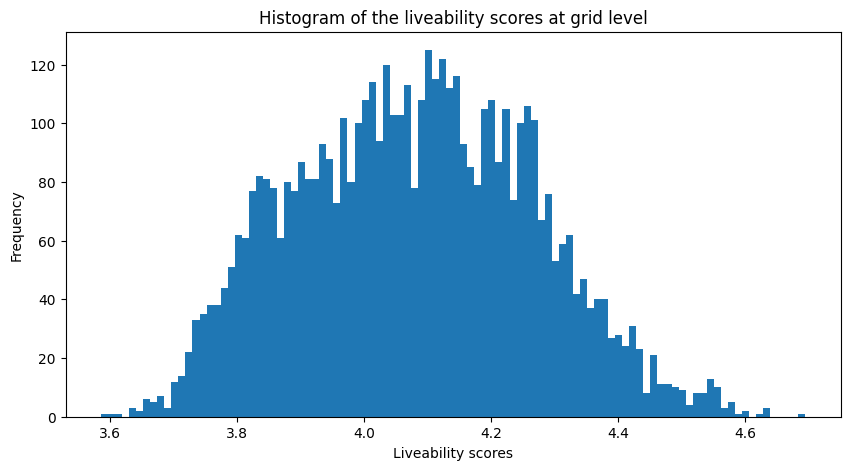

In [ ]:
#  Plot an histogram of the scores at grid level.
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(grid_lvl_liv_scores['lbm'], bins=100)
ax.set_xlabel('Liveability scores')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of the liveability scores at grid level')
plt.show()

In [ ]:
# convert to geo dataframe
grid_lvl_liv_scores = gpd.GeoDataFrame(grid_lvl_liv_scores, geometry="geometry")

#  plot in a map this distribution.
fig = Figure(width=600, height=400)
fig.add_child(grid_lvl_liv_scores.explore(column = 'lbm', cmap = 'RdYlGn', scheme = 'quantiles'))
display(fig)

Output hidden; open in https://colab.research.google.com to view.

#### 2.2. Explore how liveability relates to images using the two dataset created in 1.4.
##### 2.2.1. Visualise the images from the image-level dataset (from 1.4.2) in groups based on its liveability scores. Similarly as in Lab Session 03 use the number of percentiles (`n_percentiles`) and the number of images per percentile (`images_per_row`) to explore different groups of images. Remember to use only images available in the folder.


In [ ]:
image_path = lambda file: data_folder/'images'/file

n_percentiles = 6
images_per_row = 5

# remember to use only images available in the folder.
visual_images = img_lvl_liv_scores.loc[img_lvl_liv_scores['in_folder'] == 1].copy()
# create a new column with the quantile
visual_images['quantile'], quantile_boundaries = pd.qcut(visual_images['lbm'], n_percentiles, labels=False, retbins=True)

In [ ]:
fig = plt.figure(figsize=(20., 100.))
grid = ImageGrid(fig, 111, nrows_ncols=(n_percentiles,images_per_row+1),axes_pad=0.05)

for i in range(n_percentiles):
    # Draw 'images_per_row' random images from the quantile i
    auxs = visual_images[visual_images['quantile']==i].sample(images_per_row)[['img_path', 'lbm']].reset_index(drop=True)
    print('quantile:', i)
    # Plot the images in the grid
    for j, row in auxs.iterrows():
        img = Image.open(image_path(row['img_path'])).convert('RGB')
        grid[(i*(images_per_row+1))+j+1].imshow(img)
        grid[(i*(images_per_row+1))+j+1].axis('off')
        print('image_num:', j, 'lbm:', row['lbm'])

    grid[i*(images_per_row+1)].text(-300, 300, f'Quantile {i+1}\n ({quantile_boundaries[i]:0.2f}, {quantile_boundaries[i+1]:0.2f})', fontsize=15, ha='center', va='center')
    grid[i*(images_per_row+1)].axis('off')

# Show the figure
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def plot_images(df, title=""):
  # Set the number of images per row
  images_per_row = 5

  # Create a figure with a grid
  fig = plt.figure(figsize=(20., 5.))
  grid = ImageGrid(fig, 111, nrows_ncols=(2, images_per_row), axes_pad=0.05)

  # Plot the images in the grid
  for i, row in df.iterrows():
      img = Image.open(image_path(row['img_path'])).convert('RGB')
      grid[i].imshow(img)

      # Do not show axis
      grid[i].axis('off')

  # Show the figure
  fig.suptitle(title, fontsize=15)
  plt.show()

In [ ]:
# plot least and most attractive images

# Sort the images by attractiveness and get the first and last images
mins = visual_images.sort_values(by='lbm', ascending=True).head(images_per_row*2).reset_index(drop=True)
maxs = visual_images.sort_values(by='lbm', ascending=True).tail(images_per_row*2).reset_index(drop=True)

plot_images(mins, 'Images - lowest liveable score')
plot_images(maxs, 'Images - highest liveable score')

Output hidden; open in https://colab.research.google.com to view.

##### 2.2.2. Repeat the previous step but using the grid-level dataset (from 1.4.1). To select the images, pick up them randomly from each grid cell. Remember to use only images available in the folder.

In [ ]:
# use grid-level dataset and split into quanitiles
grid_lvl_liv_scores['quantile'], quantile_boundaries = pd.qcut(grid_lvl_liv_scores['lbm'], n_percentiles, labels=False, retbins=True)

# get the image dataset. remember to use only images available in the folder.
visual_images = liv_img_df.loc[liv_img_df['in_folder'] == 1].copy()

In [ ]:
n_percentiles = 6
images_per_row = 5

fig = plt.figure(figsize=(20., 100.))
grid = ImageGrid(fig, 111, nrows_ncols=(n_percentiles,images_per_row+1),axes_pad=0.05)

for i in range(n_percentiles):
    print('quantile:', i,)
    # get quantile i in the grid lvl scores
    grids = grid_lvl_liv_scores[grid_lvl_liv_scores['quantile']==i].reset_index()["grid_id"]

    # shuffle
    random.shuffle(grids)

    # for each grid, get a random image for quantile i, till we have images_per_row
    cnt = 0
    for grid_id in grids:
      # filter grid_id.
      grid_imgs = visual_images[visual_images['grid_id']==grid_id]

      # if no img data found for grid, continue
      if len(grid_imgs) == 0:
        continue

      # get random img
      random_img = grid_imgs.sample(1)

      # get img path
      img = Image.open(image_path(random_img.iloc[0]['img_path'])).convert('RGB')
      grid[(i*(images_per_row + 1))+cnt+1].imshow(img)
      grid[(i*(images_per_row + 1))+cnt+1].axis('off')
      # break after needed images retrieved
      cnt += 1
      print('image_num:', cnt, 'lbm:', random_img.iloc[0]['lbm'], 'grid_id:', grid_id)
      if cnt == images_per_row:
        break

    grid[i*(images_per_row+1)].text(-300, 300, f'Quantile {i+1}\n ({quantile_boundaries[i]:0.2f}, {quantile_boundaries[i+1]:0.2f})', fontsize=15, ha='center', va='center')
    grid[i*(images_per_row+1)].axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 2.3. Can you visually see to what extent the images contain information about liveability? Which dataset (from 1.4.1 and 1.4.2) is more promising? Comment.

-  I can visually see how the livability score is associated with the images. Images with more greenery in them tend to have a higher liveability score.
- Generally, the images in quantile 1 look "uglier" than the images in quantile 6
- However, in my opinion there are some images in certain quantiles that I disagree with, that is there may be incorrect lbm scores (also may be subjective)
- The image-level dataset (1.4.2) looks more promising. Looking at the images and determining the liveability is more reliable. The grid-level dataset takes the mean of each grid. If the grid only has one image, it will define the whole grid data which is not reliable.


### **3. Model training**
#### 3.1. Use linear regression as benchmark to decide wich dataset (from 1.4.1 and 1.4.2) to use for predicting liveability based on the image embedding.

In [ ]:
def eval_regression_perf(model, X_train, X_test, Y_train, Y_test):

    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)

    def perfs(Y, Y_pred):
        mse = mean_squared_error(Y,Y_pred)
        mae = mean_absolute_error(Y,Y_pred)
        R2 = r2_score(Y,Y_pred)
        return mse,mae,R2

    mse_train, mae_train, r2_train = perfs(Y_train, Y_pred_train)
    mse_test,  mae_test , r2_test  = perfs(Y_test,Y_pred_test)

    print('Performance')
    print(f'Mean Squared  Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'Mean Absolute Error Train | Test: \t{mae_train:>7.4f}\t|  {mae_test:>7.4f}')
    print(f'R2                  Train | Test: \t{ r2_train:>7.4f}\t|  {r2_test:>7.4f}\n')


def plot_heatmap(df):
  # heatmap of correlations
  fig, axes = plt.subplots(figsize=(7, 6))
  fig.set_tight_layout(True)

  corr = df.corr()
  corr_mask = np.triu(np.ones_like(corr, dtype=bool))
  corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask = corr_mask, cmap=corr_cmap, annot=False,square = True, linewidths=.5, ax = axes)

  plt.show()

##### Evaluate 1.4.1

In [ ]:
grid_lvl_liv_scores.head()

,grid_id,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024,lbm,geometry,quantile
0,E0856N4305,-0.126113,0.909103,0.558425,0.105320,-0.219774,-0.210232,-0.171359,0.708695,0.172920,-0.148897,-0.063610,-0.510081,0.227656,0.091232,-0.010341,0.210725,-0.081583,-0.106927,0.030671,-0.104153,0.083397,0.222121,0.072629,0.110482,-0.171689,4.028502,"POLYGON ((85600.000 430600.000, 85700.000 4306...",2
1,E0856N4306,0.140440,0.027736,0.500388,0.165996,-0.449353,-0.431725,-0.179611,0.298974,0.021425,-0.268523,0.098016,-0.405274,0.135758,0.012134,0.003273,0.143702,-0.388221,-0.046958,-0.039401,-0.001958,0.086077,0.047250,-0.092709,0.007814,-0.035031,4.106012,"POLYGON ((85600.000 430700.000, 85700.000 4307...",3
2,E0856N4307,0.075298,0.394816,0.624360,0.093109,-0.269590,-0.401463,-0.328335,0.291207,0.114880,-0.106873,0.054890,-0.375803,0.211759,0.187272,0.145149,-0.048426,-0.078905,-0.005008,0.033514,0.042668,-0.059909,0.082229,-0.040335,0.246177,0.014012,4.106012,"POLYGON ((85600.000 430800.000, 85700.000 4308...",3
3,E0857N4308,-0.158297,0.345437,0.326584,0.119556,0.086642,-0.171378,-0.248970,0.111283,0.028131,-0.100969,0.047887,-0.067962,0.237958,0.002794,0.047906,-0.000474,-0.014080,0.014757,-0.078611,0.042604,0.030145,-0.019859,-0.017769,0.010976,0.091305,4.265085,"POLYGON ((85700.000 430900.000, 85800.000 4309...",5
4,E0857N4337,-0.272522,0.319324,-0.132277,-0.131865,-0.190744,0.286021,0.050971,0.124943,-0.011335,-0.421288,0.252193,0.195562,0.153604,-0.181387,-0.195684,-0.020217,-0.102350,-0.110797,-0.114083,0.002715,-0.069512,0.240145,-0.062337,-0.006512,0.080296,4.011545,"POLYGON ((85700.000 433800.000, 85800.000 4338...",2


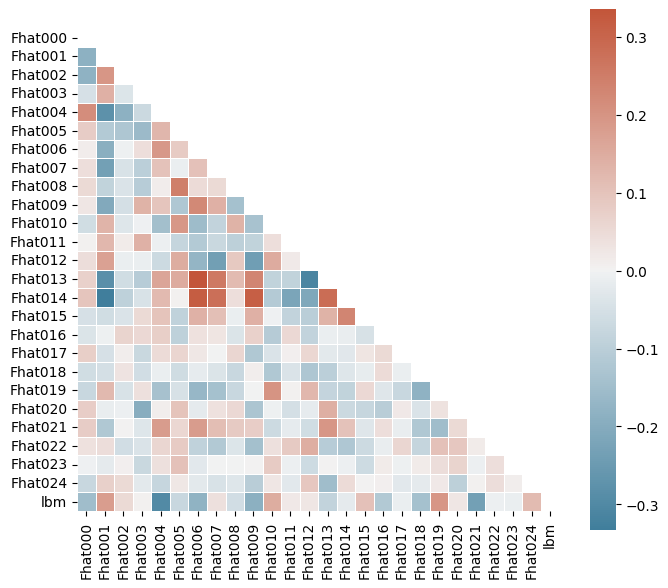

In [ ]:
# heatmap of correlations
plot_heatmap(grid_lvl_liv_scores.drop(columns = ['grid_id', 'geometry', 'quantile']))

In [ ]:
features = embedding_cols
predict='lbm'

def get_grid_lvl_data(X, scale_data=True):
  X = X.copy()

  if scale_data:
    # scale data
    scaler = StandardScaler()
    X[features + [predict]] = scaler.fit_transform(X[features + [predict]])

  # split data
  X_train, X_test, Y_train, Y_test = train_test_split(X[features],  X[predict], test_size = 0.3, random_state=42)
  return X_train, X_test, Y_train, Y_test

Performance
Mean Squared  Error Train | Test: 	 0.7515	|   0.7452
Mean Absolute Error Train | Test: 	 0.7017	|   0.7057
R2                  Train | Test: 	 0.2466	|   0.2578



<Axes: >

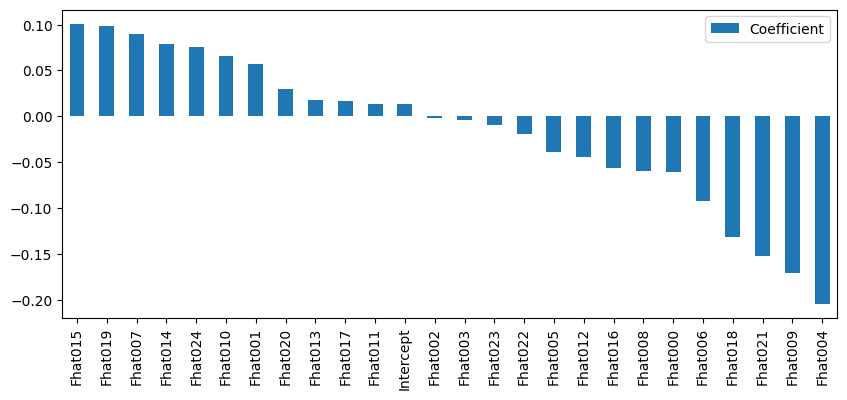

In [ ]:
# grid lvl data
X = grid_lvl_liv_scores.copy()

# get split
X_train, X_test, Y_train, Y_test = get_grid_lvl_data(X, scale_data=True)

# train model
regr = LinearRegression(fit_intercept = True)
regr.fit(X_train, Y_train)

# evaluate
eval_regression_perf(regr, X_train, X_test, Y_train, Y_test)

regr_results_int = pd.DataFrame(index = ['Intercept'], data = regr.intercept_, columns = ['Coefficient'])
regr_results_wei = pd.DataFrame(index = X[features].columns, data = regr.coef_, columns = ['Coefficient'])
regr_results = pd.concat([regr_results_int,regr_results_wei],axis=0)
regr_results.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(10, 4))

#### Evaluate 1.4.2

In [ ]:
# evaluate 1.4.2
img_lvl_liv_scores.head()

,img_id,img_path,in_folder,grid_id,geometry_y,lbm,attractiveness,lat,lng,Fhat000,Fhat001,Fhat002,Fhat003,Fhat004,Fhat005,Fhat006,Fhat007,Fhat008,Fhat009,Fhat010,Fhat011,Fhat012,Fhat013,Fhat014,Fhat015,Fhat016,Fhat017,Fhat018,Fhat019,Fhat020,Fhat021,Fhat022,Fhat023,Fhat024
0,234,image_21196_s_a.png,0,E0856N4305,POINT (85655.806 430501.401),4.028502,0.016017,51.858757,4.380562,-0.454061,-0.279382,0.143441,0.073631,-0.799556,0.004491,-0.290859,1.248252,0.370356,0.392681,-0.295085,-0.340704,0.711004,-0.100404,-0.021217,0.010035,-0.113780,-0.310289,0.619990,-0.270729,-0.020261,-0.119323,0.214641,0.424651,0.069786
1,236,image_21797_s_a.png,0,E0856N4305,POINT (85657.397 430548.103),4.028502,0.383540,51.859177,4.380575,0.294461,1.707786,1.344066,0.430017,-0.303416,0.614052,-0.243397,1.829705,0.777537,-0.440240,0.050873,-0.500387,-0.019523,-0.405672,0.256484,0.629185,0.282877,-0.137070,0.489095,-0.010531,0.095800,0.420153,0.450607,0.452335,0.077682
2,25595,image_21188_s_a.png,0,E0856N4305,POINT (85656.895 430509.694),4.028502,-0.096377,51.858831,4.380576,-0.324805,0.945984,0.749246,-0.211064,0.118075,-0.322199,-0.748130,0.560701,-0.020741,0.280885,-0.609894,-0.417840,0.701130,0.241629,0.060950,-0.024245,-0.249913,-0.391093,0.324586,-0.038033,0.040931,0.173469,0.243190,0.196485,-0.248089
3,25597,image_21801_s_a.png,0,E0856N4305,POINT (85658.101 430555.076),4.028502,-0.134578,51.859239,4.380584,-0.388213,0.783659,0.782140,-0.057619,-0.547016,0.164716,-0.229319,0.931257,0.444032,0.272908,-0.015121,-0.055022,0.093413,0.153241,0.107013,0.036907,0.056523,-0.321386,-0.407252,-0.320208,-0.021554,0.287461,-0.055059,0.184817,-0.060066
4,50956,image_21196_s_b.png,0,E0856N4305,POINT (85655.806 430501.401),4.028502,0.801206,51.858757,4.380562,1.202982,0.709187,0.912886,0.147258,0.075501,-0.574030,0.210779,0.540275,-0.284226,-0.310750,0.008865,-0.638444,0.159704,0.123565,-0.219927,0.357648,-0.683845,0.335622,0.386555,-0.272547,-0.141410,0.132837,0.128378,-0.125836,-0.398335


In [ ]:
# include location for each image as feature
features = embedding_cols + ['lat', 'lng']

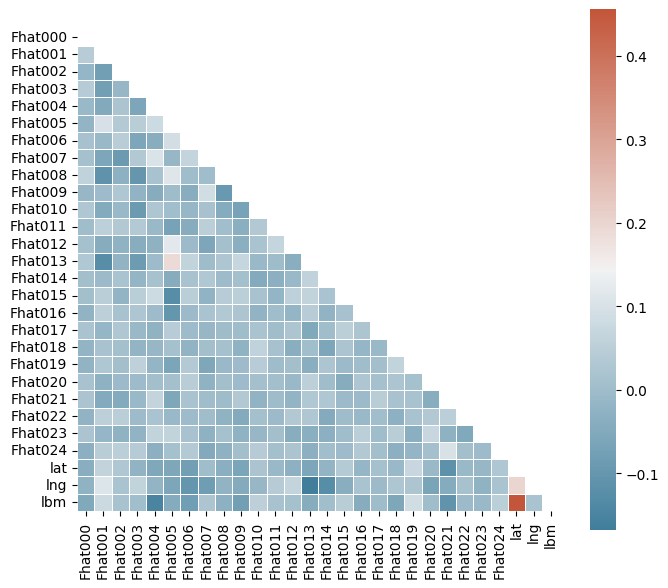

In [ ]:
# heatmap of correlations
plot_heatmap(img_lvl_liv_scores[features + [predict]])

In [ ]:
def get_img_lvl_data(X, scale_data=True):
  X=X.copy()

  if scale_data:
    # scale data
    scaler = StandardScaler()
    X[features + [predict]] = scaler.fit_transform(X[features + [predict]])

  # split data
  X_train, X_test, Y_train, Y_test = train_test_split(X[features],  X[predict], test_size = 0.3, random_state = 42)
  return X_train, X_test, Y_train, Y_test

Performance
Mean Squared  Error Train | Test: 	 0.7369	|   0.7450
Mean Absolute Error Train | Test: 	 0.7005	|   0.7049
R2                  Train | Test: 	 0.2627	|   0.2561



<Axes: >

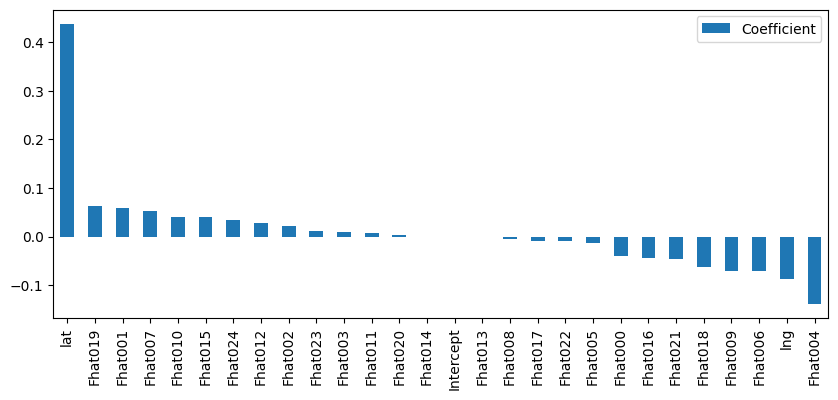

In [ ]:
# img lvl data
X = img_lvl_liv_scores.copy()

# get data
X_train, X_test, Y_train, Y_test = get_img_lvl_data(X, scale_data=True)

# train model
regr = LinearRegression(fit_intercept = True)
regr.fit(X_train, Y_train)

# evaluate
eval_regression_perf(regr, X_train, X_test, Y_train, Y_test)

regr_results_int = pd.DataFrame(index = ['Intercept'], data = regr.intercept_, columns = ['Coefficient'])
regr_results_wei = pd.DataFrame(index = X[features].columns, data = regr.coef_, columns = ['Coefficient'])
regr_results = pd.concat([regr_results_int,regr_results_wei],axis=0)
regr_results.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(10, 4))

#### 3.2. Do you think the results from linear regression is consistent with the results from the data exploration? Could you think of an explanation?

- The results from linear regression seem consistent with data exploration. The image-level data is more consistent according to their quartiles. The grid-level data has some inconsistent images that don't fit within their quartile range.

- The model does not seem to overfit the data: it attains the same performance on the test as on the train data sets.
- Based on the plot, we can infer that most feature are likely to contribute to the prediction performance, since they are nonzero.

#### 3.3. Train different machine learning models to predict liveability based on the embedding features. Report here two best models you found.

##### 3.3.1 Model 1 - Decision Tree

In [ ]:
# use image-level data. no scaling for dt
X = img_lvl_liv_scores.copy()
X_train, X_test, Y_train, Y_test = get_grid_lvl_data(X, scale_data=False)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X.shape)

(42721, 27) (42721,) (18309, 27) (18309,) (61030, 34)


In [ ]:
# create a decision Tree
dt = DecisionTreeRegressor(criterion='squared_error', random_state=42)

hyperparameter_space = {
    'min_samples_split': range(2, 10)
    }

scorer = make_scorer(mean_squared_error, greater_is_better = False)

# cross validation splits
folds = 5
dt_gridsearch = GridSearchCV(dt, hyperparameter_space, n_jobs=-1, cv=folds,scoring = scorer)

if not Path('data/dt_gridsearch.pickle').exists():

    dt_gridsearch.fit(X_train, Y_train)

    # Save the trained grid_search object
    with open('data/dt_gridsearch.pickle', 'wb') as f:
        pickle.dump(dt_gridsearch, f)
else:
    # Load the trained grid_search object
    with open('data/dt_gridsearch.pickle', 'rb') as f:
        dt_gridsearch = pickle.load(f)

print(f'Optimal hyperparameters:\n{dt_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-dt_gridsearch.best_score_):0.3f}')

Optimal hyperparameters:
{'min_samples_split': 9}
Mean Squared Error:	0.026


In [ ]:
# create and train a dt model using hyperparams
min_samples_split = dt_gridsearch.best_params_['min_samples_split']

dt = DecisionTreeRegressor(criterion='squared_error',
                           min_samples_split=min_samples_split,
                           random_state=42)
dt.fit(X_train, Y_train)

# evaluate the performance of the trained model
eval_regression_perf(dt, X_train, X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0000	|   0.0006
Mean Absolute Error Train | Test: 	 0.0013	|   0.0074
R2                  Train | Test: 	 0.9985	|   0.9811



##### 3.2.1 Model 2 - MLP

In [ ]:
# use image-level data. scaling for mlp
X = img_lvl_liv_scores.copy()
X_train, X_test, Y_train, Y_test = get_grid_lvl_data(X, scale_data=True)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X.shape)

(42721, 27) (42721,) (18309, 27) (18309,) (61030, 34)


In [ ]:
# create MLP object
mlp_gs = MLPRegressor(activation = 'tanh',
                      solver='adam',
                      batch_size=250,
                      max_iter=2000,
                      early_stopping=True,
                      random_state=42)

hyperparameter_space = {
    'hidden_layer_sizes': [(20,20),(25,25),(30,30)],
    'alpha': [1, 0.1, 0.01],
    'learning_rate_init': [0.01, 0.001],
    }

scorer = make_scorer(mean_squared_error, greater_is_better = False)

# cross validation splits
folds = 5
mlp_gridsearch = GridSearchCV(mlp_gs, hyperparameter_space, n_jobs=-1, cv=folds,scoring = scorer)

# if the model mlp_gridsearch.pickle does not exist, conduct the gridsearch, else load the grid_search object
if not Path('data/mlp_gridsearch.pickle').exists():

    mlp_gridsearch.fit(X_train, Y_train)

    # Save the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'wb') as f:
        pickle.dump(mlp_gridsearch, f)
else:
    # Load the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'rb') as f:
        mlp_gridsearch = pickle.load(f)

print(f'Optimal hyperparameters:\n{mlp_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-mlp_gridsearch.best_score_):0.3f}')

Optimal hyperparameters:
{'alpha': 0.01, 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.01}
Mean Squared Error:	0.205


In [ ]:
# create and train a MLP model using hyperparams
hidden_layer_sizes =  mlp_gridsearch.best_params_['hidden_layer_sizes']
alpha = mlp_gridsearch.best_params_['alpha']
learning_rate_init = mlp_gridsearch.best_params_['learning_rate_init']

mlp = MLPRegressor(activation='tanh',
                      solver='adam',
                      batch_size = 250,
                      max_iter=2000,
                      hidden_layer_sizes = hidden_layer_sizes,
                      alpha = alpha,
                      learning_rate_init = learning_rate_init,
                      early_stopping=True,
                      random_state=42)

mlp.fit(X_train, Y_train)

# evaluate the performance of the trained model
eval_regression_perf(mlp, X_train, X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.1750	|   0.1890
Mean Absolute Error Train | Test: 	 0.3199	|   0.3310
R2                  Train | Test: 	 0.8249	|   0.8113



#### 3.4. Train an ensemble model to see if combining your models the performance is improved.

#### 3.4.1 Random Forest

In [ ]:
# Create RF object for hyperparameter tuning
rf_gs = RandomForestRegressor(n_estimators = 50,
                              max_leaf_nodes=500,
                              criterion= "squared_error",
                              random_state=42,
                              n_jobs=-1)

# Define the hyperparameter search space
hyperparameter_space = {
    'max_depth': [5, 10, 20],
    }

scorer = make_scorer(mean_squared_error, greater_is_better = False)

folds = 5
rf_gridsearch = GridSearchCV(rf_gs, hyperparameter_space, n_jobs=-1, cv=folds, scoring=scorer, return_train_score=True)

if not Path('data/rf_gridsearch.pickle').exists():

    rf_gridsearch.fit(X_train, Y_train)

    with open('data/rf_gridsearch.pickle', 'wb') as f:
        pickle.dump(rf_gridsearch, f)
else:
    with open('data/rf_gridsearch.pickle', 'rb') as f:
        rf_gridsearch = pickle.load(f)

# Print the best parameters
print('Best parameters:')
print(f'Tuned hyperparameters:\n{rf_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-rf_gridsearch.best_score_):0.3f}')

Best parameters:
Tuned hyperparameters:
{'max_depth': 20}
Mean Squared Error:	0.044


In [ ]:
# Set the hyperparameters of the Random Forest to the best values found
max_depth =  rf_gridsearch.best_params_['max_depth']

# Create the Random Forest object with the best hyperparameters
rf = RandomForestRegressor(n_estimators=50,
                           max_leaf_nodes=500,
                           criterion= "squared_error",
                           max_depth=max_depth,
                           random_state=42,
                           n_jobs=-1)

# train the Randon Forest
rf.fit(X_train, Y_train)

# evaluate the performance of the hyperparameter optimised RF model
eval_regression_perf(rf, X_train, X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0350	|   0.0437
Mean Absolute Error Train | Test: 	 0.1430	|   0.1546
R2                  Train | Test: 	 0.9650	|   0.9564



#### 3.4.2 Voting Regressor

In [ ]:
r1 = dt
r2 = mlp

vg = VotingRegressor([('dt', r1), ('mlp', r2)])
vg.fit(X_train, Y_train)
eval_regression_perf(vg, X_train, X_test, Y_train, Y_test)

Performance
Mean Squared  Error Train | Test: 	 0.0447	|   0.0570
Mean Absolute Error Train | Test: 	 0.1613	|   0.1774
R2                  Train | Test: 	 0.9553	|   0.9431



Seems like combining models does improve the performance.

### **4. Reflection**
#### 4.1. How well do the images predict liveability? Can they be used to predict liveability? Comment.

- The models seem to predict the image liveability relatively well. They have good training and test accuraccy as well as low mean squared error.
- However, predicting liveability is a complex task that goes beyond the capabilities of machine learning models alone. They depend on factors like infrastructure, economic opportunies, education, safety, healthcare services, social and cultural opportunities and housing that may not be captured by images alone.
- Therefore, predicting liveability from images should be used as a tool, and not entirely relied upon.
- It's important to note that while machine learning models can provide valuable insights, they are not infallible and are only as good as the data they are trained on. Additionally, ethical considerations and potential biases in the data must be carefully addressed to ensure fair and accurate predictions.


#### 4.2. What are the drawbacks of using images to predict liveability? How can this approach can be improved to better predict liveability? Comment.

**Drawbacks**
- The images can only capture the visible aspects of the environments, for example, green spaces and cleaniliness. However, they mght not provide insights into factors like economic opportunities, healthcare, education etc.
- The images are subjective and people might interpret it differently. The perception of liveability can be influenced by personal biases, cultural differences, and individual preferences that a model doesn't take into account.
- Liveability is a dynamic concept influenced by various factors that change over time. Images provide a static snapshot and may not capture temporal changes or trends.

**Improvements**
- Combine the image data with other types of data, for example, socioeconomic indicators, to create a more comprehensive analysis. This can provide a more holistic understanding of liveability. This is known as multimodal data integration.
- You can involve community members in the data collection process to gather insights that may not be apparent from images alone. Local knowledge can provide context and nuance to the analysis.
- Regularly validate and update the models using ground truth data and feedback from the community. This ensures that predictions align with the actual lived experiences of residents.
